In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import pickle

In [4]:
df = pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
X = df.iloc[:,2:-1]
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [6]:
y= df.iloc[:,[-1]]
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [7]:
X_train,X_val, y_train,y_val = train_test_split(X,y,test_size=0.25, random_state=0)
print(X_train.shape,X_val.shape)

(310, 5) (104, 5)


In [8]:
y_train, y_val = y_train.to_numpy(), y_val.to_numpy()

In [9]:
y_train.shape

(310, 1)

In [34]:
degree = 8
poly=PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
print(X_train_poly.shape)

(310, 1287)


In [35]:
sc = StandardScaler()
sc.fit(X_train_poly)
X_train_scaled = sc.transform(X_train_poly)
X_val_scaled = sc.transform(X_val_poly)

In [36]:
X_train_scaled[:5]

array([[ 0.        , -0.40538356, -0.72684272, ...,  0.15104723,
         0.00653155, -0.20928968],
       [ 0.        , -0.52936105,  0.19272947, ..., -0.40158325,
         0.17191711,  1.00203819],
       [ 0.        ,  1.42771227, -0.58273643, ...,  0.43374964,
         0.48296898,  0.49222402],
       [ 0.        ,  1.2594571 ,  3.44855944, ..., -2.55135767,
        -2.94757185, -3.1479101 ],
       [ 0.        ,  1.5871119 , -0.62407855, ...,  0.33949934,
         0.42623935,  0.49873361]])

In [37]:
model = Ridge(alpha=10)
model.fit(X_train_scaled, y_train)

Ridge(alpha=10)

In [38]:
train_score = model.score(X_train_scaled,y_train)
print("Train Score:", train_score)

Train Score: 0.6942452365630798


In [39]:
val_score = model.score(X_val_scaled, y_val)

In [40]:
print("Vall Score:", val_score)

Vall Score: 0.7280057578234995


In [41]:
params= {}
params['degrees']= [1,2,3,4,5,6,7,8,9,10]
params['alpha'] = [0.01, 0.1, 10,50]

In [50]:
def fit(X_train_scaled, y_train, X_val_scaled,y_val,degree, alpha,grid_search=False,exp_name=None):
    polypoly= PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    sc = StandardScaler()
    sc.fit(X_train_poly)
    X_train_scaled = sc.transform(X_train_poly)
    X_val_scaled = sc.transform(X_val_poly)
    
    model = Ridge(alpha)
    model.fit(X_train_scaled, y_train)
    
    train_score = model.score(X_train_scaled, y_train)
    val_score = model.score(X_val_scaled, y_val)
    
    if grid_search:
        scores= [exp_name, degree, alpha, train_score, val_score]
        return scores
    else:
        print('Train Score:', train_score)
        print('Val Score:', val_score)
        return model, poly, sc

In [51]:
from tqdm.notebook import tqdm

In [52]:
result=[]
exp_id = 1
for i in tqdm(range(len(params['degrees']))):
    degree = params['degrees'][i]
    for j in range(len(params['alpha'])):
        alpha = params['alpha'][j]
        exp_name= 'exp '+ str(exp_id)
        exp_id+= 1
        result.append(fit(X_train_scaled, y_train,X_val_scaled, y_val,degree,alpha,grid_search=True,exp_name=exp_name))
    result

In [53]:
result_df = pd.DataFrame(result, columns= ['Experiment_id', 'Degree', 'Alpha', 'Train Score','Val Score'])
result_df

,Experiment_id,Degree,Alpha,Train Score,Val Score
0,exp 1,1,0.01,0.767002,0.690407
1,exp 2,1,0.10,0.737559,0.695664
2,exp 3,1,10.00,0.694245,0.728006
3,exp 4,1,50.00,0.679144,0.720578
4,exp 5,2,0.01,0.767002,0.690407
5,exp 6,2,0.10,0.737559,0.695664
6,exp 7,2,10.00,0.694245,0.728006
7,exp 8,2,50.00,0.679144,0.720578
8,exp 9,3,0.01,0.767002,0.690407
9,exp 10,3,0.10,0.737559,0.695664


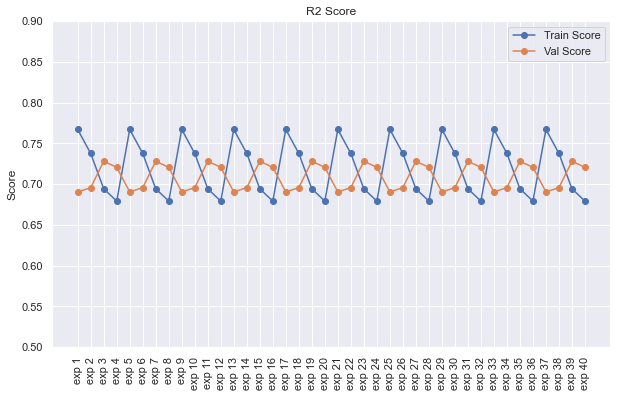

In [54]:
plt.figure(figsize=(10,6), facecolor='white')
plt.title("R2 Score")
plt.plot(result_df['Train Score'], marker='o', label='Train Score')
plt.plot(result_df['Val Score'], marker='o', label='Val Score')
plt.xticks(list(range(len(result_df))), result_df['Experiment_id'],rotation=90)
plt.ylabel('Score')
plt.ylim((0.5,0.9))
plt.legend()
plt.show()

In [55]:
result_df.sort_values(by='Val Score', ascending=False)

,Experiment_id,Degree,Alpha,Train Score,Val Score
2,exp 3,1,10.00,0.694245,0.728006
30,exp 31,8,10.00,0.694245,0.728006
38,exp 39,10,10.00,0.694245,0.728006
6,exp 7,2,10.00,0.694245,0.728006
26,exp 27,7,10.00,0.694245,0.728006
34,exp 35,9,10.00,0.694245,0.728006
10,exp 11,3,10.00,0.694245,0.728006
22,exp 23,6,10.00,0.694245,0.728006
18,exp 19,5,10.00,0.694245,0.728006
14,exp 15,4,10.00,0.694245,0.728006


In [56]:
result_df.loc[result_df['Experiment_id'] == 'exp 31']

,Experiment_id,Degree,Alpha,Train Score,Val Score
30,exp 31,8,10.0,0.694245,0.728006


In [57]:
best_model,poly,sc = fit(X_train_scaled,y_train,X_val_scaled,y_val,degree=8,alpha=10)

Train Score: 0.6942452365630798
Val Score: 0.7280057578234995


In [58]:
from pickle import dump

In [60]:
dump(best_model, open('best_model.pk1', 'wb'))
dump(poly, open('poly.pk1', 'wb'))
dump(sc, open('scalar.pk1', 'wb'))

In [61]:
from pickle import load

In [62]:
loaded_model = load(open('best_model.pk1', 'rb'))
poly = load(open('poly.pk1', 'rb'))
sc = load(open('scalar.pk1', 'rb'))

In [67]:
def prediction(model,poly,sc):
    l=[]
    l.append(float(input('Enter Age of House: ')))
    l.append(float(input('Enter Age of HouseThe Distance to the Nearest Gas Station: ')))
    l.append(float(input('Enter number of Convenience Stores: ')))
    l.append(float(input('Enter Latitude ( between 24.9 and 25): ')))
    l.append(float(input('Enter Longitude (between 121 and 122): ')))
    arr= np.array([l])
    arr = poly.transform(arr)
    scaled_arr = sc.transform(arr)
    print('Price of the house per unit area: ', round(model.predict(scaled_arr)[0][0],2))
    

In [68]:
prediction(loaded_model,poly,sc)

Enter Age of House: 19.5
Enter Age of HouseThe Distance to the Nearest Gas Station: 306.59470
Enter number of Convenience Stores: 9
Enter Latitude ( between 24.9 and 25): 24.98034
Enter Longitude (between 121 and 122): 121.53951
Price of the house per unit area:  45.19
